In [1]:
import snowflake.connector
import pandas as pd

connect = snowflake.connector.connect(
    account = 'pia10938.us-east-1',
    user = 'pu_team_3',
    password = '8a0268daeb2d8081',
    database = 'pu_team_3',
    schema = 'pu_team_3',
    warehouse = 'PU_S',
    role='pu_team_3',
)

In [2]:
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine
from snowflake.connector.pandas_tools import pd_writer

engine = create_engine(URL(
    account = 'pia10938.us-east-1',
    user = 'pu_team_3',
    password = '8a0268daeb2d8081',
    database = 'pu_team_3',
    schema = 'pu_team_3',
    warehouse = 'PU_S',
    role='pu_team_3',
))

In [7]:
sql_query = pd.read_sql_query("""SELECT TRAINING_ID, AVERAGE_EXERCISES_IDLE_TIME, WEIGHT_OF_PASS,
                              (CASE WHEN TOTAL_BALLS_FIRED <> '0' THEN TOTAL_GOALS / TOTAL_BALLS_FIRED
                                ELSE '0' END) ACCURACY_RATE, SUBSTRING(DATE, 7, 4) YEAR, SUBSTRING(DATE, 0, 2) MONTH,
                                (CASE WHEN MONTH BETWEEN '01' AND '03' THEN 'Q1'
                                WHEN MONTH BETWEEN '04' AND '06' THEN 'Q2'
                                WHEN MONTH BETWEEN '07' AND '09' THEN 'Q3'
                                WHEN MONTH BETWEEN '10' AND '12' THEN 'Q4'
                                ELSE 'N/A' END) QUARTER FROM PU_TEAM_3.PU_TEAM_3.MAIN
                                WHERE YEAR = '2021'""", connect)
training = pd.DataFrame(sql_query)
connect.close()

In [4]:
training.head(10)

,TRAINING_ID,TRAINING_SESSION_ID,DATE,SITE_ID,TOCA_CENTER_NAME,PLAYER_PATHWAY_ID,PATHWAY_NAME,PATHWAY_SESSION_NUMBER,TOTAL_BALLS_FIRED,TOTAL_GOALS,...,NUMBER_OF_CUSTOM_EXERCISES_COMPLETED,WARM_UP_BALLS_FIRED,FOCUS_ONE_BALLS_FIRED,FOCUS_TWO_BALLS_FIRED,COMPETITION_BALLS_FIRED,PATHWAY_ID_NUM,BALLS_DELIVERED,GOALS_SCORED,EXERCISES_COMPLETED,TRAINER_NAME
0,61b6381eef0a2376a13b5654,61b63828ef0a2376a13b5656,12-12-2021,508197.0,TOCA Chino Hills,None,None,0,172,64,...,0,57,0,0,24,NaN,NaN,NaN,NaN,Shane Nguyen
1,61b63830ef0a2376a13b577f,61b63831ef0a2376a13b5780,12-12-2021,5722524.0,TOCA Denver,61b62b0fef0a2376a13b39cc,Core Skills,1,271,136,...,0,55,126,90,0,4.0,1894.0,916.0,105.0,Kelby Kuo
2,61b63890ef0a2376a13b5a24,61b63890ef0a2376a13b5a25,12-12-2021,437964.0,TOCA Redmond,6188079bef0a449cf7e32b16,Attack Minded,6,312,98,...,0,60,73,179,0,3.0,1935.0,825.0,107.0,Chloe Feyerick
3,61b638ceef0a2376a13b5b90,61b638ceef0a2376a13b5b93,12-11-2021,876801.0,TOCA Langley,None,None,0,135,64,...,0,58,0,0,0,NaN,NaN,NaN,NaN,Min Chan Jeon
4,61b63936ef0a2376a13b5f04,61b63936ef0a2376a13b5f05,12-12-2021,5720010.0,TOCA Nashville,61b62dc4ef0a2376a13b454e,Game Awareness,1,256,114,...,0,120,72,46,18,5.0,1606.0,756.0,72.0,Marcus Gordon-Lewis
5,61b64437ef0a2376a13b7002,61b64439ef0a2376a13b7003,12-12-2021,528224.0,TOCA Lynnwood,None,None,0,324,200,...,0,72,0,0,90,NaN,NaN,NaN,NaN,Rofaiel Dawood
6,61b64480ef0a2376a13b7128,61b64481ef0a2376a13b712a,12-12-2021,5722524.0,TOCA Denver,None,None,0,268,135,...,0,54,0,0,126,NaN,NaN,NaN,NaN,Kelby Kuo
7,61b64497ef0a2376a13b720a,61b64498ef0a2376a13b720b,12-12-2021,508197.0,TOCA Chino Hills,61a3d01aef0aa78f0b5b433b,Attack Minded,2,207,70,...,0,62,37,54,54,3.0,1551.0,493.0,78.0,Yerry Mendez
8,61b644aeef0a2376a13b7472,61b644afef0a2376a13b7473,12-12-2021,508197.0,TOCA Chino Hills,61a18171ef0aa78f0b5950b1,Attack Minded,4,288,149,...,0,72,108,60,48,3.0,1642.0,762.0,83.0,Sarah Spiers
9,61b64501ef0a2376a13b760a,61b64501ef0a2376a13b760b,12-12-2021,437964.0,TOCA Redmond,60fda498ef0acd0a1698ca69,Attack Minded,4,379,191,...,0,56,125,198,0,3.0,2294.0,1114.0,123.0,Chloe Feyerick


In [ ]:
# Categories Table

In [4]:
categories = pd.DataFrame()

for i in range(0, training.shape[0]):
    json_parse = pd.read_json(training['CATEGORIES'].iloc[i])
    json_parse['Training_ID'] = training['_ID'][i]
    categories = categories.append(json_parse, ignore_index=True)

del training

In [5]:
categories.head(10)

,_id,categoryId,endTime,exercises,exercisesCompleted,exercisesStarted,name,startTime,totalBallsFired,Training_ID,challenge
0,-1,5e5dd3f4ef0acbf6710a8bff,1583207379318,"[{'_id': -1, 'adjusted': False, 'connectedTarg...",22,1,Custom Category,1583204435499,396,5e5dd3f4ef0acbf6710a8c00,NaN
1,26,5e5dd445ef0acbf6710a8dd9,1583207240391,"[{'_id': 795, 'adjusted': False, 'blueScoreBoa...",1,0,02 | MONTHLY CHALLENGE,1583207042665,17,5e5dd445ef0acbf6710a8e15,0.0
2,-1,5e5dd445ef0acbf6710a8e14,1583207404737,"[{'_id': -1, 'adjusted': False, 'connectedTarg...",10,2,Custom Category,1583204411508,192,5e5dd445ef0acbf6710a8e15,NaN
3,-1,5e5de31bef0acbf6710a9457,1583211125832,"[{'_id': -1, 'adjusted': False, 'connectedTarg...",18,1,Custom Category,1583207977064,432,5e5de31bef0acbf6710a9458,NaN
4,-1,5e5df15cef0acbf6710a9483,1573605606582,"[{'_id': -1, 'adjusted': False, 'connectedTarg...",7,7,Custom Category,1573603589227,129,5e5df15cef0acbf6710a9484,NaN
5,1,5e5df59def0acbf6710a949f,1583216006321,"[{'_id': -1, 'adjusted': True, 'connectedTarge...",13,0,03 | PASSING,1583213169607,234,5e5df59def0acbf6710a94a0,0.0
6,19,5e5e0c23ef0acbf6710a94ad,1583221745050,"[{'_id': -1, 'adjusted': True, 'connectedTarge...",3,2,00 | VIDEO LIBRARY,1583220651905,57,5e5e0c23ef0acbf6710a94ae,0.0
7,19,5e5e2003ef0acbf6710a94c9,1583226821598,"[{'_id': -1, 'adjusted': True, 'connectedTarge...",6,7,00 | VIDEO LIBRARY,1583224397578,160,5e5e2003ef0acbf6710a94ca,0.0
8,1,5e5e2135ef0acbf6710a951b,1583227137211,"[{'_id': -1, 'adjusted': True, 'connectedTarge...",12,2,03 | PASSING,1583224273490,320,5e5e2135ef0acbf6710a951c,0.0
9,19,5e5e3571ef0acbf6710a95ad,1583232324163,"[{'_id': -1, 'adjusted': True, 'connectedTarge...",4,0,00 | VIDEO LIBRARY,1583230779342,84,5e5e3571ef0acbf6710a95ae,0.0


In [ ]:
upload_table = categories
upload_table = upload_table.drop(columns='exercises')
upload_table.columns = map(str.upper, upload_table.columns)

In [ ]:
upload_table.to_sql('json_categories', engine, index=False, method=pd_writer)
engine.dispose()

In [ ]:
# Exercises Table

In [6]:
exercises = pd.DataFrame()

for i in range(0, categories.shape[0]):
    json_parse = pd.json_normalize(categories['exercises'].iloc[i])
    json_parse['Category_ID'] = categories['categoryId'][i]
    exercises = exercises.append(json_parse, ignore_index=True)

del categories

In [9]:
exercises.head(50)

,_id,adjusted,connectedTargetsSerialNumber,deliveryCodes,endTime,exerciseId,name,startTime,status,totalBallsFired,touchTrainerSerialNumber,Category_ID,targetPatternRun,blueScoreBoard.goals,blueScoreBoard.randomGoals,blueScoreBoard.team,yellowScoreBoard.goals,yellowScoreBoard.randomGoals,yellowScoreBoard.team
0,-1.0,False,[],"[{'_id': -1, 'angle': 'CENTER', 'ballCount': 1...",1.583204e+12,5e5dd3f4ef0acbf6710a8b3a,Custom 18_G_C_2_3,1.583204e+12,COMPLETED,18.0,TOCA T2 ID:000453,5e5dd3f4ef0acbf6710a8bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.0,False,[],"[{'_id': -1, 'angle': 'CENTER', 'ballCount': 1...",1.583205e+12,5e5dd3f4ef0acbf6710a8b3c,Custom 18_G_C_2_3,1.583205e+12,COMPLETED,18.0,TOCA T2 ID:000453,5e5dd3f4ef0acbf6710a8bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.0,False,[],"[{'_id': -1, 'angle': 'CENTER', 'ballCount': 1...",1.583205e+12,5e5dd3f4ef0acbf6710a8b3e,Custom 18_G_C_2_3,1.583205e+12,COMPLETED,18.0,TOCA T2 ID:000453,5e5dd3f4ef0acbf6710a8bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.0,False,[],"[{'_id': -1, 'angle': 'CENTER', 'ballCount': 1...",1.583205e+12,5e5dd3f4ef0acbf6710a8b40,Custom 18_G_C_2_3,1.583205e+12,COMPLETED,18.0,TOCA T2 ID:000453,5e5dd3f4ef0acbf6710a8bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.0,False,[],"[{'_id': -1, 'angle': 'LEFT/RIGHT', 'ballCount...",1.583205e+12,5e5dd3f4ef0acbf6710a8b53,Custom 18_G_L/R_1_3,1.583205e+12,COMPLETED,18.0,TOCA T2 ID:000453,5e5dd3f4ef0acbf6710a8bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-1.0,False,[],"[{'_id': -1, 'angle': 'LEFT/RIGHT', 'ballCount...",1.583205e+12,5e5dd3f4ef0acbf6710a8b66,Custom 18_G_L/R_1_3,1.583205e+12,COMPLETED,18.0,TOCA T2 ID:000453,5e5dd3f4ef0acbf6710a8bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-1.0,False,[],"[{'_id': -1, 'angle': 'LEFT/RIGHT', 'ballCount...",1.583205e+12,5e5dd3f4ef0acbf6710a8b79,Custom 18_G_L/R_1_3,1.583205e+12,COMPLETED,18.0,TOCA T2 ID:000453,5e5dd3f4ef0acbf6710a8bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-1.0,False,[],"[{'_id': -1, 'angle': 'LEFT/RIGHT', 'ballCount...",1.583205e+12,5e5dd3f4ef0acbf6710a8b8c,Custom 18_G_L/R_1_3,1.583205e+12,COMPLETED,18.0,TOCA T2 ID:000453,5e5dd3f4ef0acbf6710a8bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1.0,False,[],"[{'_id': -1, 'angle': 'LEFT/RIGHT', 'ballCount...",1.583205e+12,5e5dd3f4ef0acbf6710a8b9f,Custom 18_G_L/R_1_3,1.583205e+12,COMPLETED,18.0,TOCA T2 ID:000453,5e5dd3f4ef0acbf6710a8bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-1.0,False,[],"[{'_id': -1, 'angle': 'CENTER', 'ballCount': 1...",1.583206e+12,5e5dd3f4ef0acbf6710a8ba1,Custom 18_G_C_1_3,1.583206e+12,COMPLETED,18.0,TOCA T2 ID:000453,5e5dd3f4ef0acbf6710a8bff,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
upload_table = exercises
upload_table = upload_table.drop(columns='deliveryCodes')
upload_table.columns = map(str.upper, upload_table.columns)

In [ ]:
upload_table.to_sql('json_exercises', engine, index=False, method=pd_writer)
engine.dispose()

In [ ]:
# Deliveries Table

In [10]:
deliveries = pd.DataFrame()

for i in range(0, exercises.shape[0]):
    json_parse = pd.json_normalize(exercises['deliveryCodes'].iloc[i])
    json_parse['Exercise_ID'] = exercises['exerciseId'][i]
    deliveries = deliveries.append(json_parse, ignore_index=True)

del exercises

In [11]:
deliveries.head(10)

,_id,angle,ballCount,deliveryCodeBallStatus,deliveryCodeId,elevation,name,repeatCount,speed,timeInterval,Exercise_ID
0,-1.0,CENTER,18.0,"[{'ballNumber': 1, 'elevation': 0, 'scoredDura...",5e5dd3f4ef0acbf6710a8b39,FOOT_GROUND,18_G_C_2_3,1.0,TWO,3.0,5e5dd3f4ef0acbf6710a8b3a
1,-1.0,CENTER,18.0,"[{'ballNumber': 1, 'elevation': 0, 'scoredDura...",5e5dd3f4ef0acbf6710a8b3b,FOOT_GROUND,18_G_C_2_3,1.0,TWO,3.0,5e5dd3f4ef0acbf6710a8b3c
2,-1.0,CENTER,18.0,"[{'ballNumber': 1, 'elevation': 0, 'scoredDura...",5e5dd3f4ef0acbf6710a8b3d,FOOT_GROUND,18_G_C_2_3,1.0,TWO,3.0,5e5dd3f4ef0acbf6710a8b3e
3,-1.0,CENTER,18.0,"[{'ballNumber': 1, 'elevation': 0, 'scoredDura...",5e5dd3f4ef0acbf6710a8b3f,FOOT_GROUND,18_G_C_2_3,1.0,TWO,3.0,5e5dd3f4ef0acbf6710a8b40
4,-1.0,LEFT/RIGHT,1.0,"[{'ballNumber': 1, 'elevation': 0, 'scoredDura...",5e5dd3f4ef0acbf6710a8b41,FOOT_GROUND,18_G_L/R_1_3,1.0,ONE,3.0,5e5dd3f4ef0acbf6710a8b53
5,-1.0,LEFT/RIGHT,1.0,"[{'ballNumber': 2, 'elevation': 0, 'scoredDura...",5e5dd3f4ef0acbf6710a8b42,FOOT_GROUND,18_G_L/R_1_3,1.0,ONE,3.0,5e5dd3f4ef0acbf6710a8b53
6,-1.0,LEFT/RIGHT,1.0,"[{'ballNumber': 3, 'elevation': 0, 'scoredDura...",5e5dd3f4ef0acbf6710a8b43,FOOT_GROUND,18_G_L/R_1_3,1.0,ONE,3.0,5e5dd3f4ef0acbf6710a8b53
7,-1.0,LEFT/RIGHT,1.0,"[{'ballNumber': 4, 'elevation': 0, 'scoredDura...",5e5dd3f4ef0acbf6710a8b44,FOOT_GROUND,18_G_L/R_1_3,1.0,ONE,3.0,5e5dd3f4ef0acbf6710a8b53
8,-1.0,LEFT/RIGHT,1.0,"[{'ballNumber': 5, 'elevation': 0, 'scoredDura...",5e5dd3f4ef0acbf6710a8b45,FOOT_GROUND,18_G_L/R_1_3,1.0,ONE,3.0,5e5dd3f4ef0acbf6710a8b53
9,-1.0,LEFT/RIGHT,1.0,"[{'ballNumber': 6, 'elevation': 0, 'scoredDura...",5e5dd3f4ef0acbf6710a8b46,FOOT_GROUND,18_G_L/R_1_3,1.0,ONE,3.0,5e5dd3f4ef0acbf6710a8b53


In [ ]:
upload_table = deliveries
upload_table = upload_table.drop(columns='deliveryCodeBallStatus')
upload_table.columns = map(str.upper, upload_table.columns)

In [ ]:
upload_table.to_sql('json_deliveries', engine, index=False, method=pd_writer)
engine.dispose()

In [ ]:
# NUMBER OF TRAINING - GRAPH

In [1]:
import snowflake.connector
import pandas as pd

connect = snowflake.connector.connect(
    account = 'pia10938.us-east-1',
    user = 'pu_team_3',
    password = '8a0268daeb2d8081',
    database = 'pu_team_3',
    schema = 'pu_team_3',
    warehouse = 'PU_S',
    role='pu_team_3',
)

In [2]:
sql_query = pd.read_sql_query('SELECT * FROM TOTAL_CLASS_TRAINER_COMPLETED', connect)
total_class = pd.DataFrame(sql_query)
connect.close()

In [5]:
total_class['NUMBER_OF_TRAINING']

0      331
1       51
2       43
3       72
4        9
      ... 
285      1
286      1
287      1
288      2
289      1
Name: NUMBER_OF_TRAINING, Length: 290, dtype: int64

In [7]:
total_class_np = total_class['NUMBER_OF_TRAINING'].to_numpy()

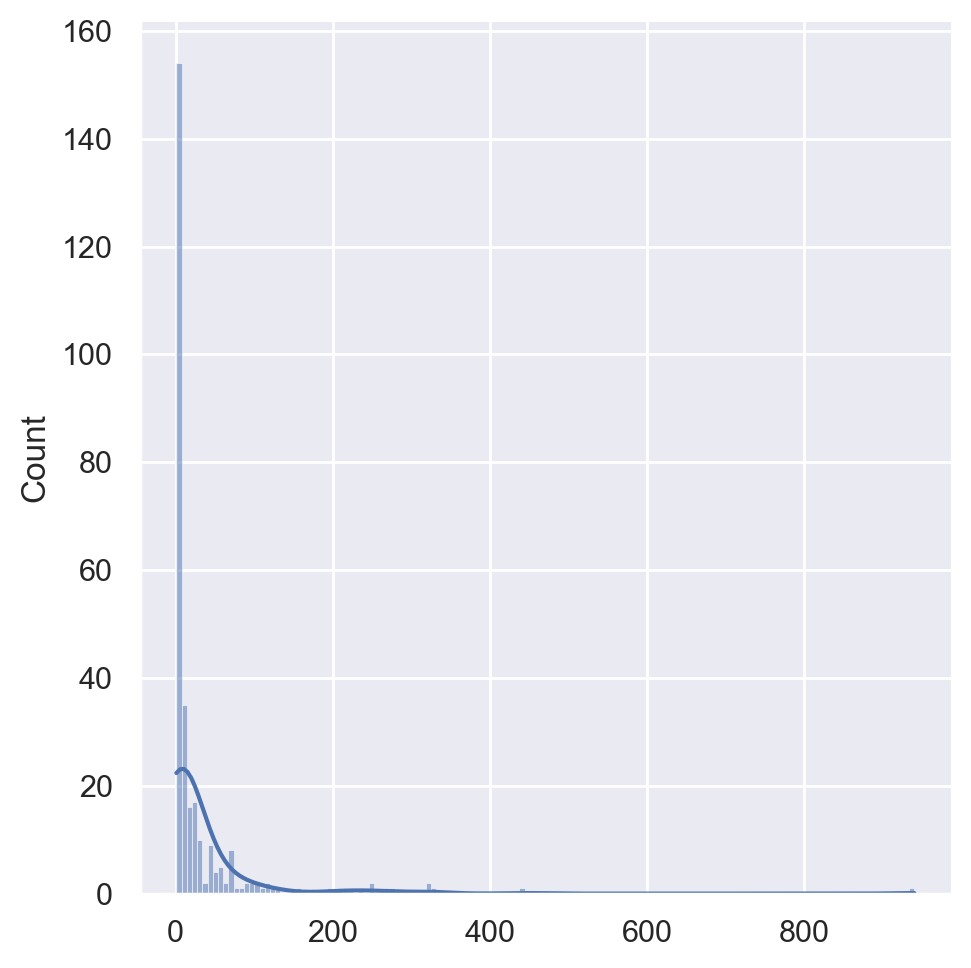

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

p = sns.displot(total_class_np, kde=True)
p.fig.set_dpi(200)

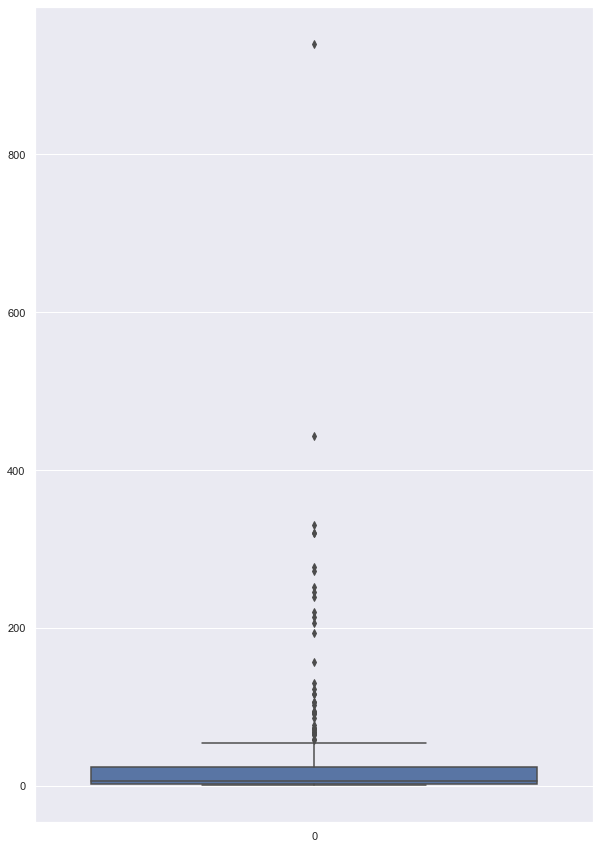

In [32]:
sns.set(rc={'figure.figsize':(10,15)})
p = sns.boxplot(data=total_class_np)

In [33]:
total_class['NUMBER_OF_TRAINING'].quantile(0.25)

2.0

In [41]:
total_class['NUMBER_OF_TRAINING'].quantile([0.25, 0.5, 0.75])

0.25     2.0
0.50     6.0
0.75    24.0
Name: NUMBER_OF_TRAINING, dtype: float64

In [8]:
# CORRELATION - GRAPH

In [86]:
import snowflake.connector
import pandas as pd

connect = snowflake.connector.connect(
    account = 'pia10938.us-east-1',
    user = 'pu_team_3',
    password = '8a0268daeb2d8081',
    database = 'pu_team_3',
    schema = 'pu_team_3',
    warehouse = 'PU_S',
    role='pu_team_3',
)

In [87]:
sql_query = pd.read_sql_query("""
        SELECT TRAINING_ID,
       (CASE WHEN NUMBER_OF_EXERCISES_STARTED <> '0'
        THEN NUMBER_OF_EXERCISES_COMPLETED / NUMBER_OF_EXERCISES_STARTED
        ELSE '0' END) COMPLETED_RATE,
       (CASE WHEN (NUMBER_OF_CUSTOM_EXERCISES_STARTED + NUMBER_OF_CUSTOM_EXERCISES_COMPLETED) <> '0'
        THEN NUMBER_OF_CUSTOM_EXERCISES_COMPLETED /
       (NUMBER_OF_CUSTOM_EXERCISES_STARTED + NUMBER_OF_CUSTOM_EXERCISES_COMPLETED)
        ELSE '0' END) AS CUSTOM_COMPLETED_RATE,
       (CASE WHEN TOTAL_BALLS_FIRED <> '0'
        THEN TOTAL_GOALS / TOTAL_BALLS_FIRED
        ELSE '0' END) ACCURACY_RATE,
        (CASE WHEN PASSES_COMPLETED <> '0'
        THEN PASSES_STREAK / PASSES_COMPLETED
        ELSE '0' END) AS PASS_STREAK_RATE,
        WEIGHT_OF_PASS, AVERAGE_EXERCISES_IDLE_TIME,
       SUBSTRING(DATE, 7, 4) YEAR, SUBSTRING(DATE, 0, 2) MONTH,
       (CASE WHEN MONTH BETWEEN '01' AND '03' THEN 'Q1'
           WHEN MONTH BETWEEN '04' AND '06' THEN 'Q2'
           WHEN MONTH BETWEEN '07' AND '09' THEN 'Q3'
           WHEN MONTH BETWEEN '10' AND '12' THEN 'Q4'
           ELSE 'N/A' END) QUARTER
        FROM PU_TEAM_3.PU_TEAM_3.MAIN
        WHERE YEAR = '2021'""", connect)
training = pd.DataFrame(sql_query)
connect.close()

In [88]:
training.head()

,TRAINING_ID,COMPLETED_RATE,CUSTOM_COMPLETED_RATE,ACCURACY_RATE,PASS_STREAK_RATE,WEIGHT_OF_PASS,AVERAGE_EXERCISES_IDLE_TIME,YEAR,MONTH,QUARTER
0,6158c5c5ef0a0630d5297658,0.933333,0.0,0.201581,0.000000,2.584980,128.012571,2021,10,Q4
1,6158c642ef0a0630d5297ba2,1.000000,0.0,0.276730,0.108696,3.383648,86.050647,2021,10,Q4
2,6158d5c9ef0a0630d529970f,1.000000,0.0,0.254902,0.000000,3.094771,66.378500,2021,10,Q4
3,6158d704ef0a0630d5299a16,0.666667,0.0,0.000000,0.000000,0.000000,55.271880,2021,10,Q4
4,6158d77fef0a0630d5299b26,0.764706,0.0,0.364000,0.153846,3.180000,67.813438,2021,10,Q4


In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
plot_dataframe = training[['TRAINING_ID', 'COMPLETED_RATE', 'CUSTOM_COMPLETED_RATE', 'ACCURACY_RATE', 'PASS_STREAK_RATE', 'WEIGHT_OF_PASS', 'AVERAGE_EXERCISES_IDLE_TIME']]

In [90]:
plot_dataframe.head()

,TRAINING_ID,COMPLETED_RATE,CUSTOM_COMPLETED_RATE,ACCURACY_RATE,PASS_STREAK_RATE,WEIGHT_OF_PASS,AVERAGE_EXERCISES_IDLE_TIME
0,6158c5c5ef0a0630d5297658,0.933333,0.0,0.201581,0.000000,2.584980,128.012571
1,6158c642ef0a0630d5297ba2,1.000000,0.0,0.276730,0.108696,3.383648,86.050647
2,6158d5c9ef0a0630d529970f,1.000000,0.0,0.254902,0.000000,3.094771,66.378500
3,6158d704ef0a0630d5299a16,0.666667,0.0,0.000000,0.000000,0.000000,55.271880
4,6158d77fef0a0630d5299b26,0.764706,0.0,0.364000,0.153846,3.180000,67.813438


In [91]:
plot_dataframe.corr()

,COMPLETED_RATE,CUSTOM_COMPLETED_RATE,ACCURACY_RATE,PASS_STREAK_RATE,WEIGHT_OF_PASS,AVERAGE_EXERCISES_IDLE_TIME
COMPLETED_RATE,1.000000,0.122282,0.280137,0.100600,0.247486,0.152791
CUSTOM_COMPLETED_RATE,0.122282,1.000000,-0.798162,-0.435381,-0.707913,-0.326215
ACCURACY_RATE,0.280137,-0.798162,1.000000,0.473362,0.925300,0.316999
PASS_STREAK_RATE,0.100600,-0.435381,0.473362,1.000000,0.431017,0.185924
WEIGHT_OF_PASS,0.247486,-0.707913,0.925300,0.431017,1.000000,0.271513
AVERAGE_EXERCISES_IDLE_TIME,0.152791,-0.326215,0.316999,0.185924,0.271513,1.000000


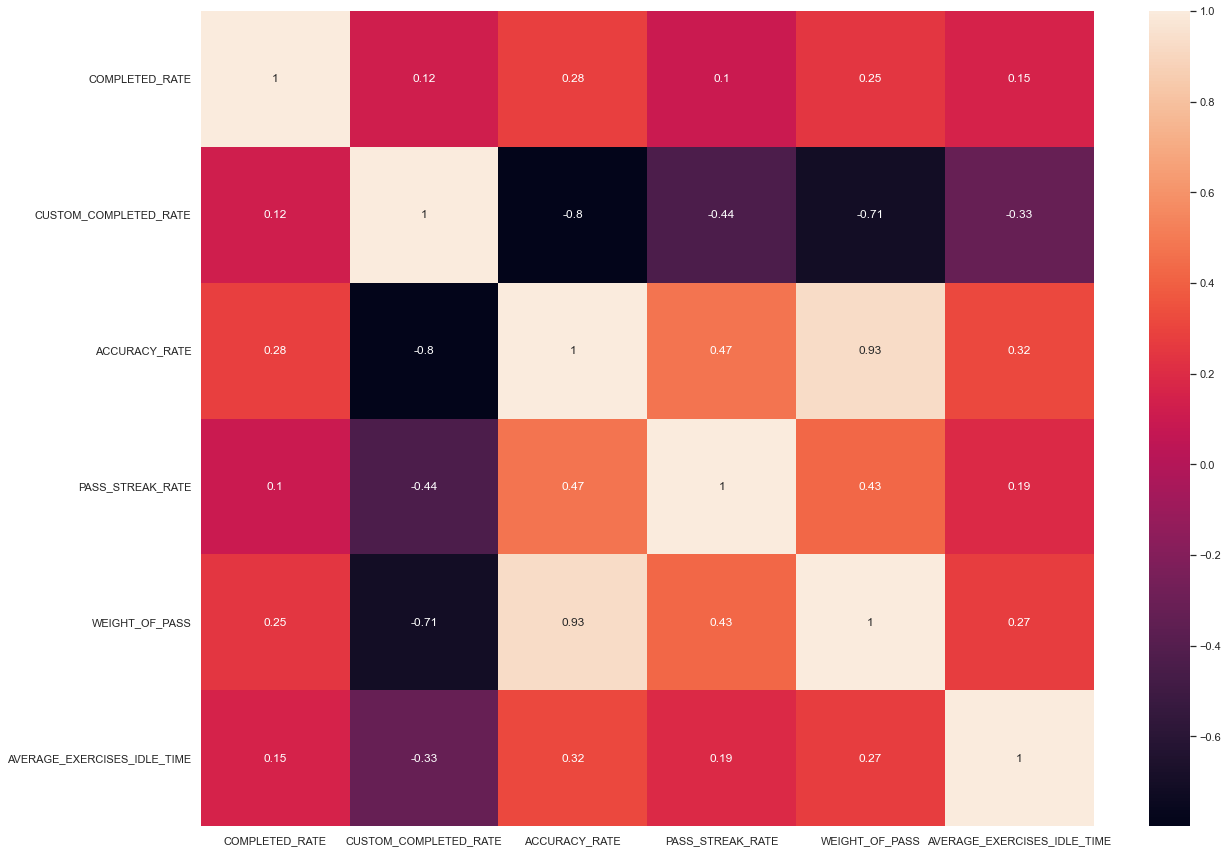

In [92]:
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(plot_dataframe.corr(), annot=True)

<AxesSubplot:xlabel='ACCURACY_RATE', ylabel='WEIGHT_OF_PASS'>

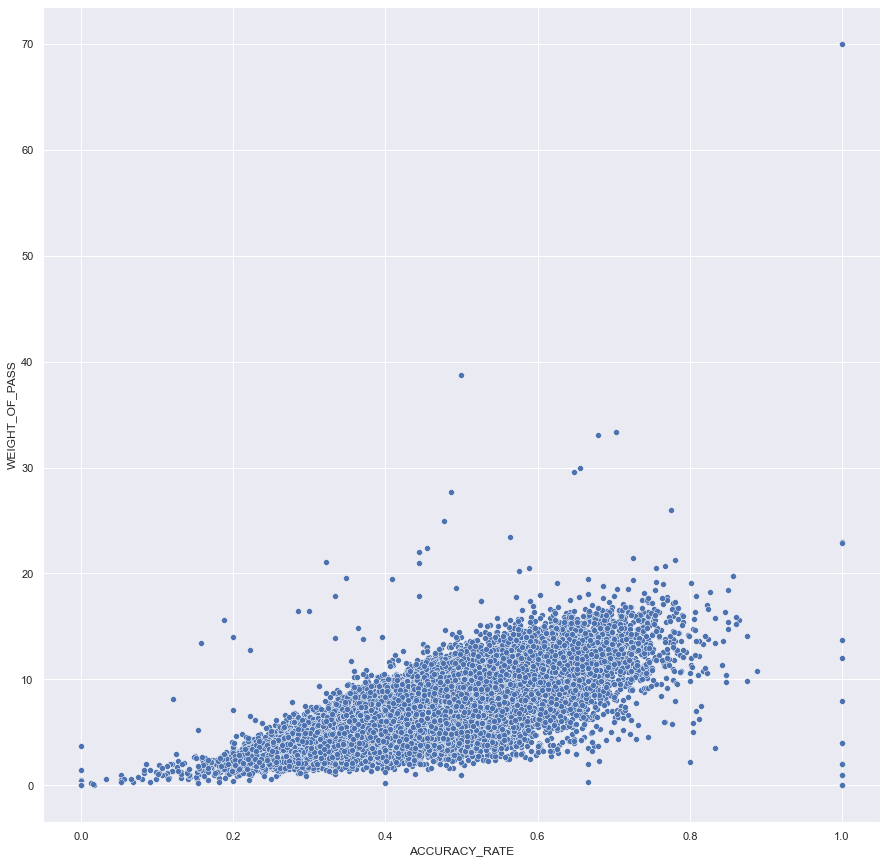

In [93]:
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=plot_dataframe[['ACCURACY_RATE', 'WEIGHT_OF_PASS']], x="ACCURACY_RATE", y="WEIGHT_OF_PASS")